In [12]:
%matplotlib inline
import glob
import os

import matplotlib.gridspec as mgrid
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns



import h5py
from umap import UMAP

from activ.clustering.viz import make_simdata_curves, make_dendrogram_scatterplots

 
from activ.clustering.viz import make_simdata_curves, plot_simdata_curvefit_results, plot_max1d_simdata_results,\
                                 make_clustered_plot, plot_real_foc_results, plot_real_accuracy_chance_results

from activ.readfile import TrackTBIFile


In [2]:
SIMDATA_SWEEP_RESULTS_PATH = 'simulation_data/dense/sweep_out/simdata.aggregated.h5'
TRACK_TBIFILE_PATH = '../tracktbi_files/tracktbi.scalar.h5'
EST_SIMDATA_SWEEP_RESULTS_PATH = 'simulation_data/dense/sweep_out/simdata.smooth.spread_asm.spread_foc.h5'
DEAD_CLUSTER_RESULTS = 'dead.ss90.u30_mean.iter250.h5'
NMF_TBIFILE_PATH = '../latent_features/NMF/tracktbi.reg_nmf.h5'
EST_SIMDATA_MAX_1D = 'simulation_data/dense/sweep_out/simdata.max1d.h5'

In [3]:
tbifile = TrackTBIFile(TRACK_TBIFILE_PATH)
emb = UMAP(n_components=2, min_dist=0, random_state=20001).fit_transform(tbifile.outcomes)

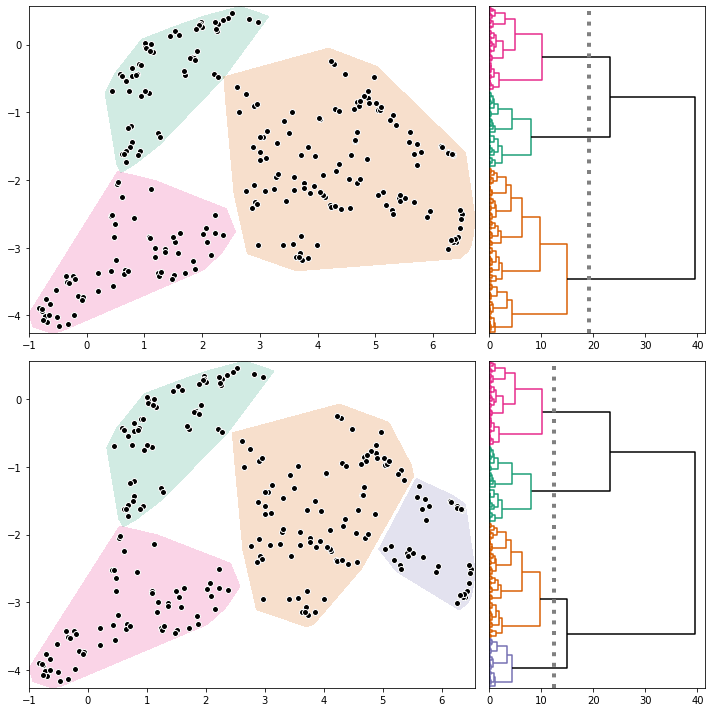

In [4]:
fig = plt.figure(figsize=(10, 10))
gs = mgrid.GridSpec(4,3)
axes = np.zeros((2, 2), dtype=object)

axes[0, 0] = fig.add_subplot(gs[0:2, 0:2])
axes[1, 0] = fig.add_subplot(gs[2:4, 0:2])

axes[0, 1] = fig.add_subplot(gs[0:2, 2])
axes[1, 1] = fig.add_subplot(gs[2:4, 2])

make_dendrogram_scatterplots(emb, axes=axes, cmap='Dark2')
plt.tight_layout()

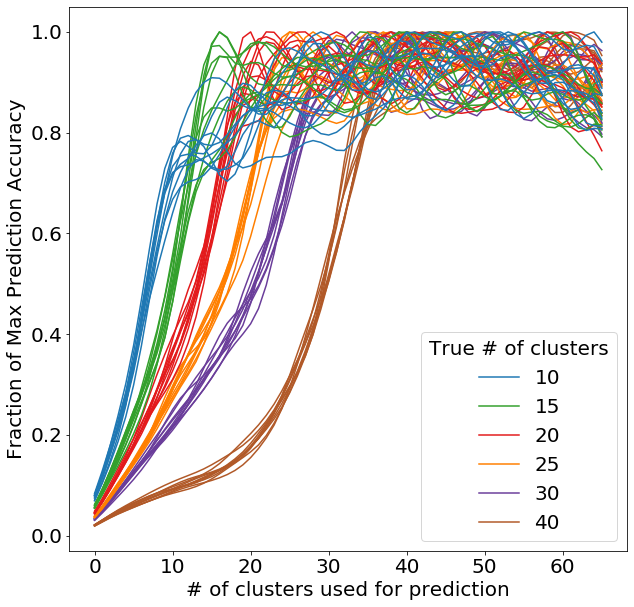

In [5]:
plt.figure(figsize=(10,10))
make_simdata_curves(path=SIMDATA_SWEEP_RESULTS_PATH, ax=plt.gca(), fontsize=20)

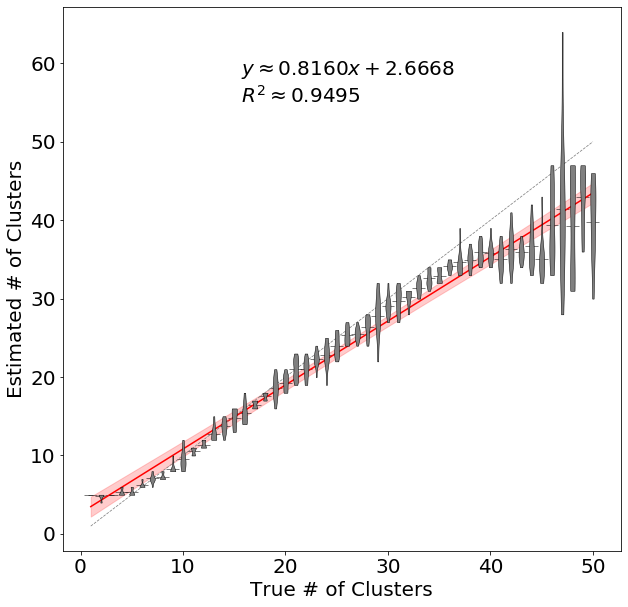

In [6]:
plt.figure(figsize=(10, 10))
plot_max1d_simdata_results(EST_SIMDATA_MAX_1D, fontsize=20)

LinearRegression()

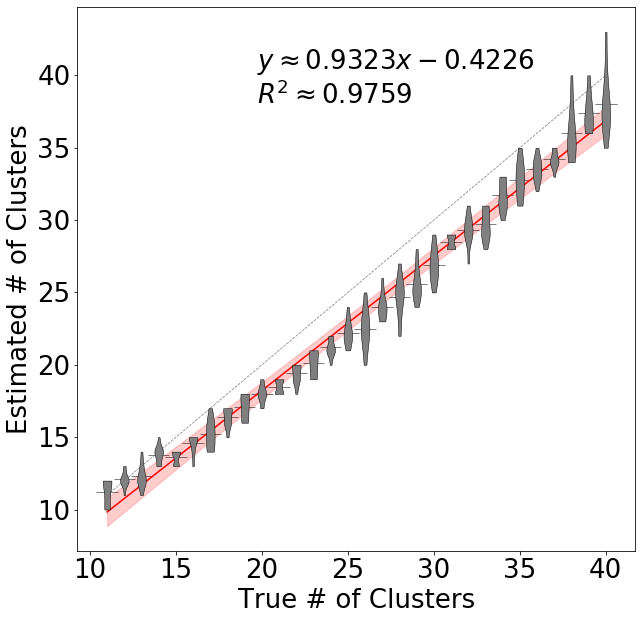

In [7]:
plt.figure(figsize=(10, 10))
plot_simdata_curvefit_results(EST_SIMDATA_SWEEP_RESULTS_PATH, fontsize=26)

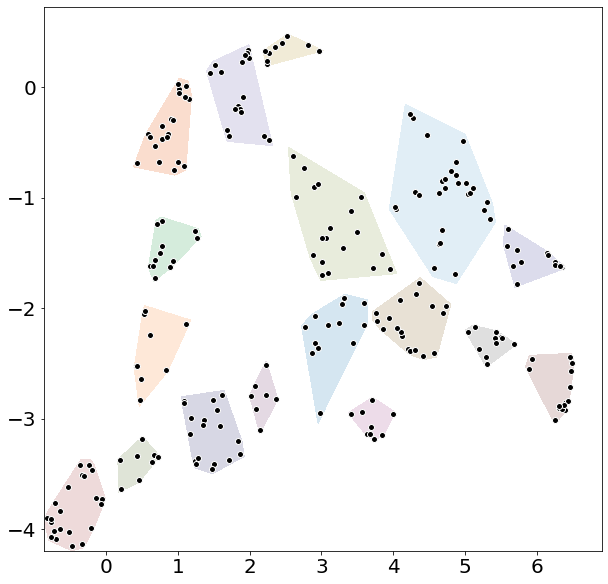

In [8]:
plt.figure(figsize=(10, 10))
all_colors = sns.color_palette('tab20b', 20).as_hex() + sns.color_palette('tab20c', 20).as_hex()
all_colors = all_colors[0::4] + all_colors[1::4] + all_colors[2::4]
all_colors = all_colors[:17]
ax = plt.gca()
ax.tick_params('both', labelsize=20)
make_clustered_plot(emb, 17, cmap=all_colors, ax=ax)

19

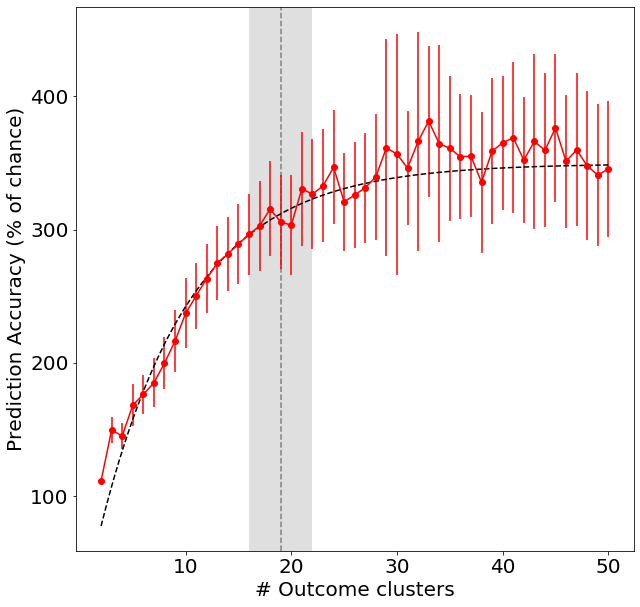

In [9]:
plt.figure(figsize=(10,10))
ax = plt.gca()
ax.tick_params('both', labelsize=20)
plot_real_foc_results(DEAD_CLUSTER_RESULTS, simdata_results_path=EST_SIMDATA_SWEEP_RESULTS_PATH, fontsize=20, ax=ax)

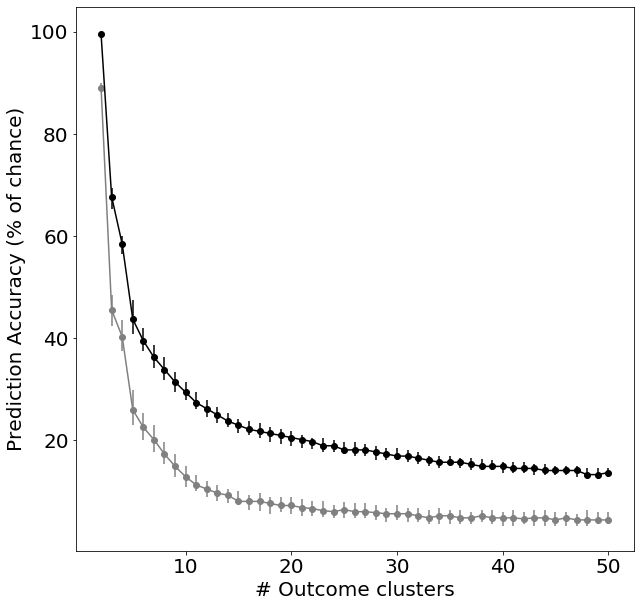

In [10]:
plt.figure(figsize=(10,10))
ax = plt.gca()
ax.tick_params('both', labelsize=20)
plot_real_accuracy_chance_results(DEAD_CLUSTER_RESULTS, fontsize=20, ax=ax)

estimate: 19


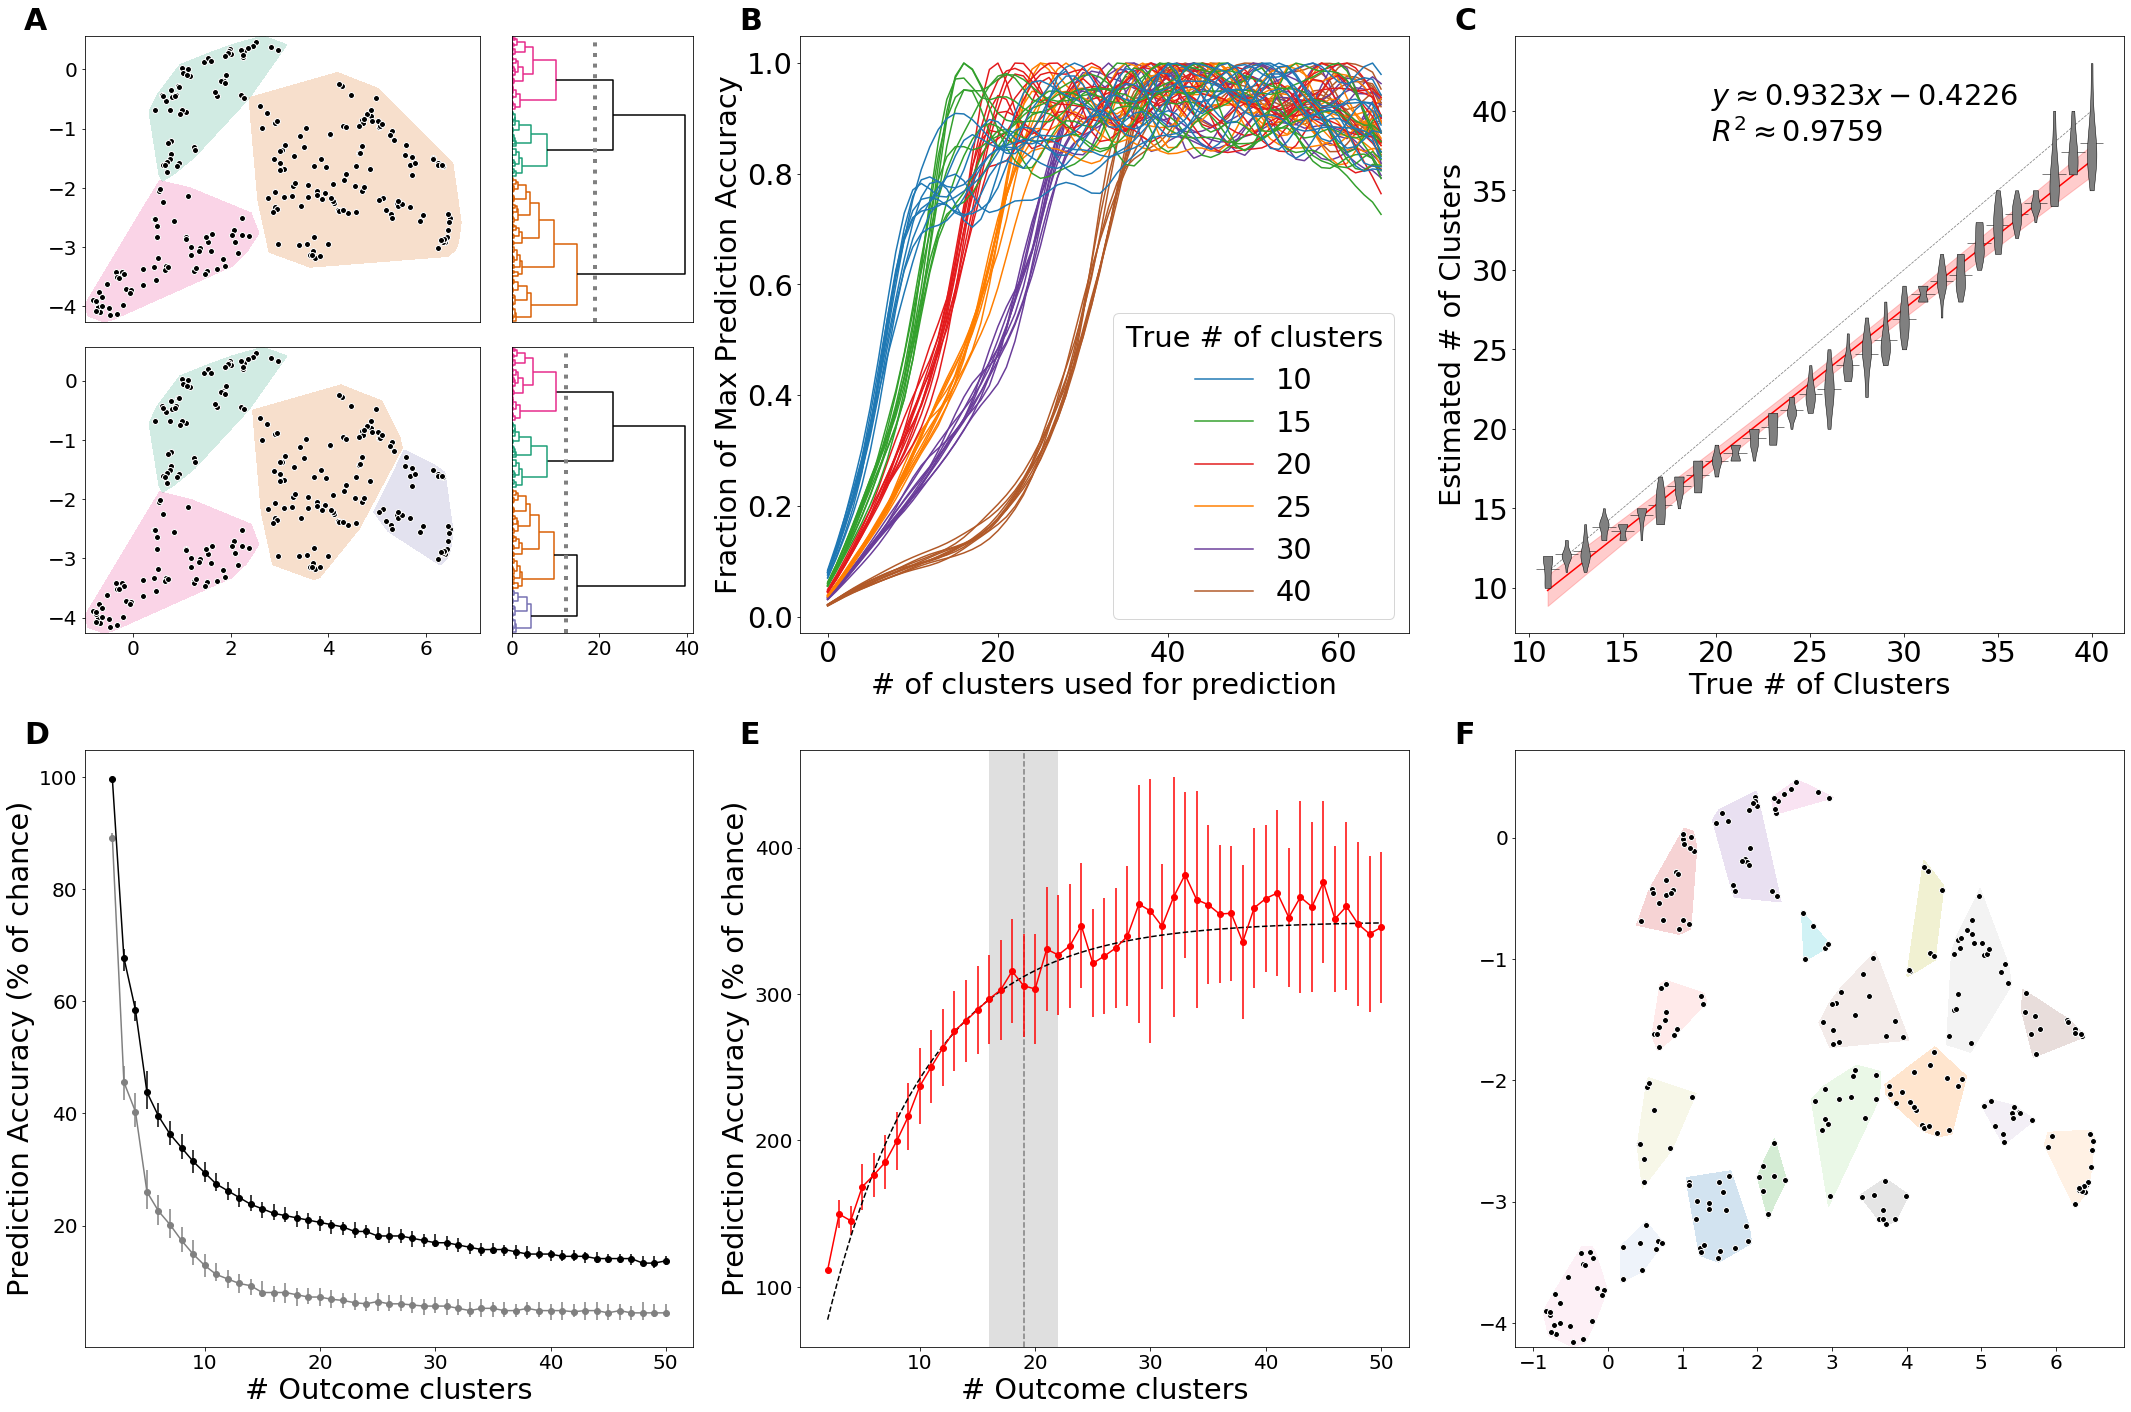

In [15]:
####
# - reorder upper right figure so 30 -25 - 20 - 15 - 10 - 5 is drawn first
# - color by dominant NMFs, and draw circles that correspond to clusters
# - UMAP scatter plot axes need numbers
# - for lower left, try violins and scattered points (black points)
#   - fit regression (red) and put CI around (pink)
#   - unity can be dotted gray line
#   - put R2 in left corner
# - bottom right - add curve fit

def add_label(ax, label):
    ax.text(-0.1, 1.01, label, transform=ax.transAxes, weight='bold', size=30)    

fig = plt.figure(figsize=(30, 20))
mpl.rcParams['font.size'] = round(0.1 * fig.get_figwidth() * fig.get_figheight())
mpl.rcParams['font.size'] = 20
gsMain = mgrid.GridSpec(2, 3)

axA = fig.add_subplot(gsMain[0, 0])
add_label(axA, 'A')
axA.axis('off')

gsA = mgrid.GridSpecFromSubplotSpec(4,3, subplot_spec=gsMain[0, 0])

axes = np.zeros((2, 2), dtype=object)
axes[0, 0] = fig.add_subplot(gsA[0:2, 0:2])

axes[1, 0] = fig.add_subplot(gsA[2:4, 0:2])

## keep this, seems like something Kris will want
axes[0, 0].get_shared_x_axes().join(axes[0,0], axes[1,0])
axes[0, 0].set_xticklabels([])
axes[0, 0].set_xticks([])

axes[0, 1] = fig.add_subplot(gsA[0:2, 2])
axes[1, 1] = fig.add_subplot(gsA[2:4, 2])
## keep this, seems like something Kris will want
axes[0, 1].get_shared_x_axes().join(axes[0,1], axes[1,1]) # this does not work
axes[0, 1].set_xticklabels([])
axes[0, 1].set_xticks([])

# UMAP plots with possible ways to cut tree
make_dendrogram_scatterplots(emb, axes=axes, cmap='Dark2')

# fold over chance for a some simulation scenarios
axB = fig.add_subplot(gsMain[0, 1])
make_simdata_curves(path=SIMDATA_SWEEP_RESULTS_PATH, ax=axB)
add_label(axB, 'B')

# dense sweep results
axC = fig.add_subplot(gsMain[0, 2])
# plot_simdata_results(EST_SIMDATA_MAX_1D, ax=axC)
plot_simdata_curvefit_results(EST_SIMDATA_SWEEP_RESULTS_PATH, ax=axC)
add_label(axC, 'C')

# accuracy and chance
axD = fig.add_subplot(gsMain[1, 0])
plot_real_accuracy_chance_results(DEAD_CLUSTER_RESULTS, ax=axD)
add_label(axD, 'D')

# fold over chance
axE = fig.add_subplot(gsMain[1, 1])
est = plot_real_foc_results(DEAD_CLUSTER_RESULTS, ax=axE, 
                            simdata_results_path=EST_SIMDATA_SWEEP_RESULTS_PATH)
print('estimate:', est)
add_label(axE, 'E')


# number of clusters 
axF = fig.add_subplot(gsMain[1, 2])
make_clustered_plot(emb, est, ax=axF, cmap='tab20')
add_label(axF, 'F')


plt.tight_layout()
plt.savefig('../paper/MultiPanel_clustering.png', dpi=200)